In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
from collections import Counter

In [3]:
toyota = pd.read_csv("ToyotaCorolla.csv", encoding='unicode_escape',)

In [11]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [12]:
toyota.shape

(1436, 38)

In [13]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [14]:
select_columns=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]
toyota=toyota[select_columns]

In [15]:
toyota.shape

(1436, 9)

In [16]:
toyota.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [17]:
toyota.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [19]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [20]:
toyota.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [21]:
toyota.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


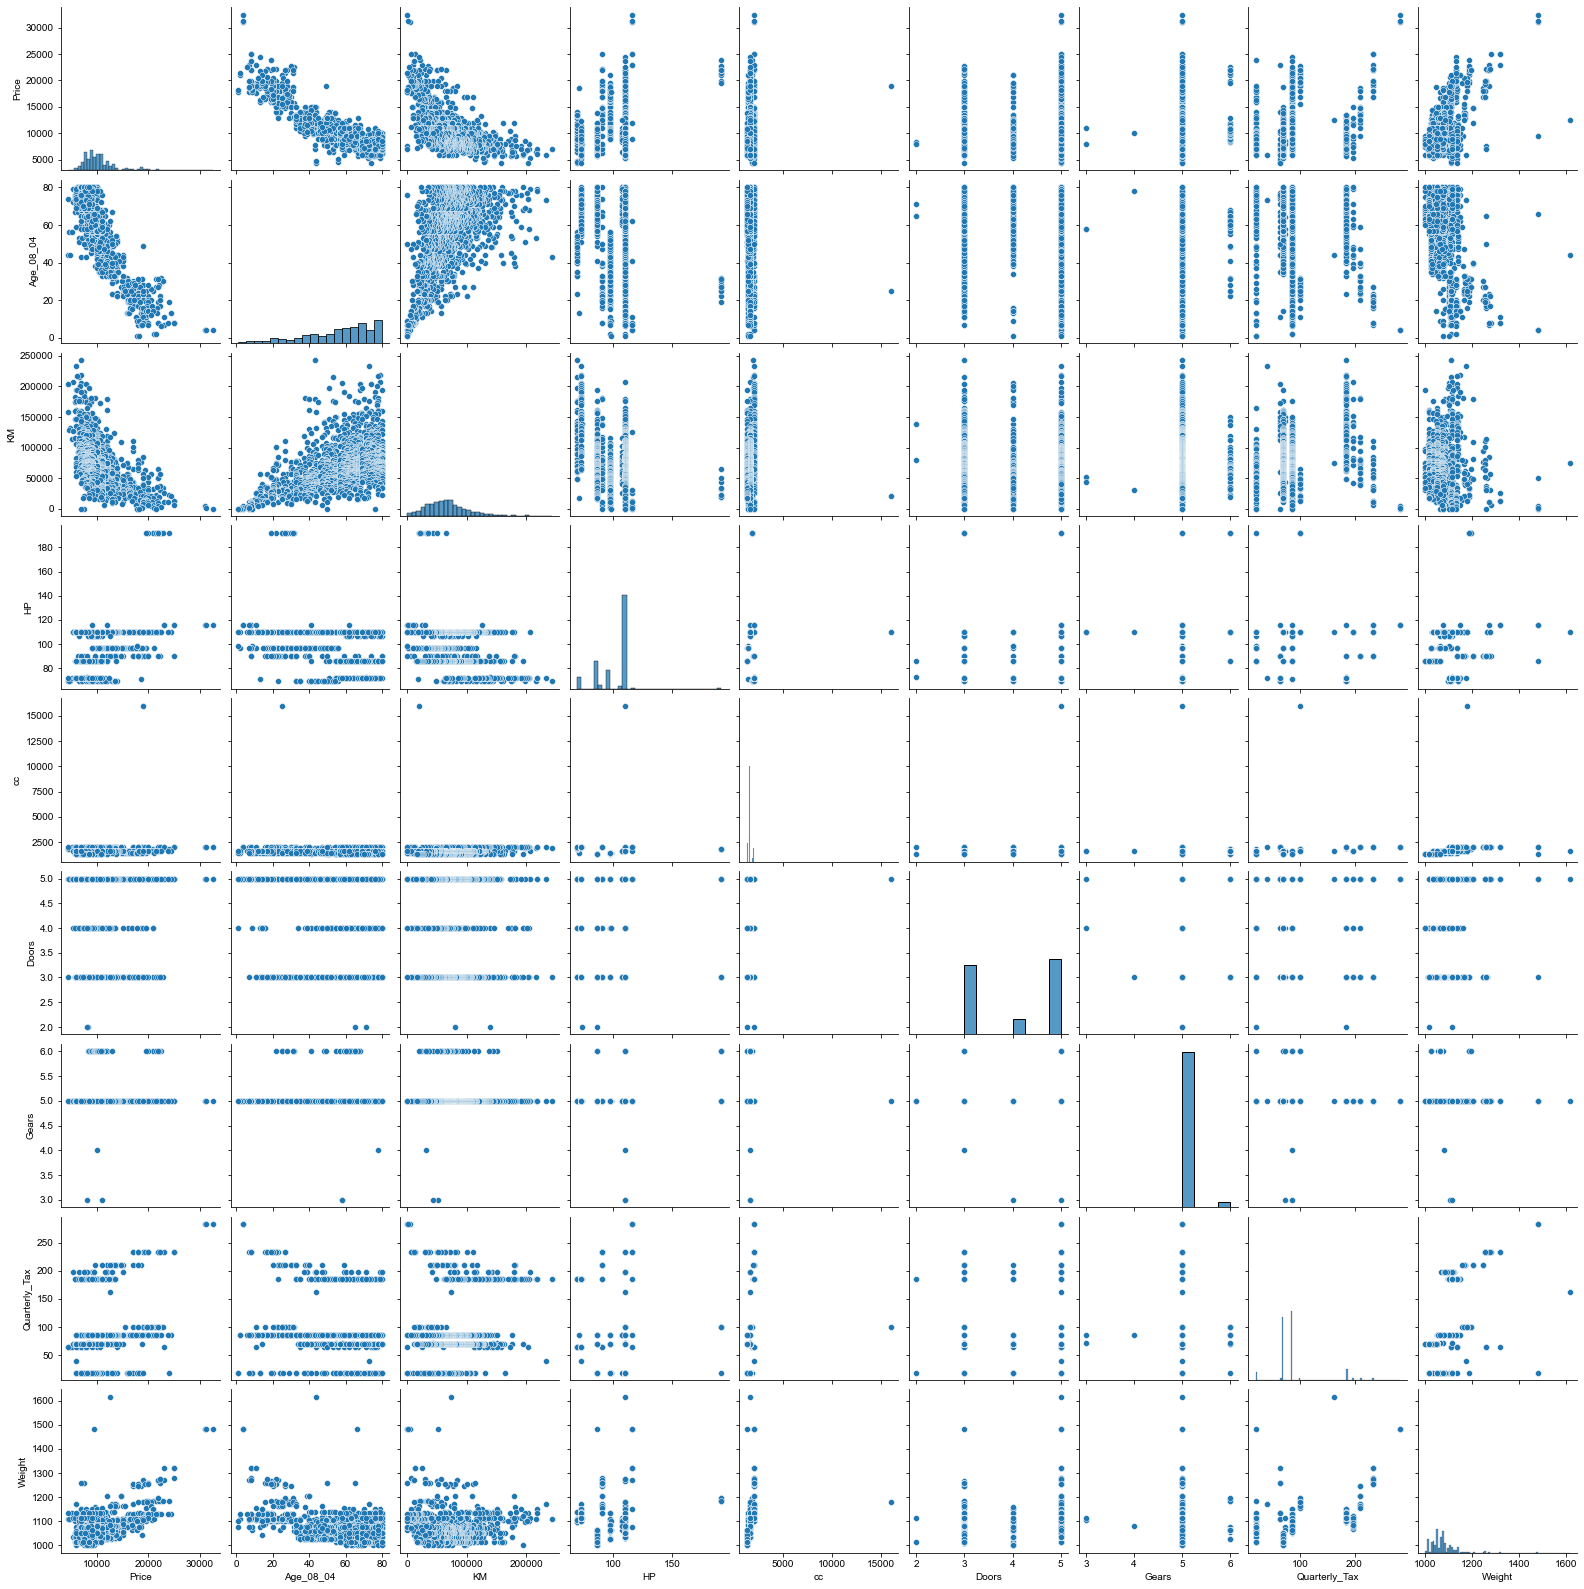

In [22]:
sns.pairplot(toyota)
sns.set_style(style='darkgrid')

In [24]:
toyota=toyota.rename({"Price":"price","Age_08_04":"age","KM":"km","HP":"hp","cc":"cc","Doors":"doors","Gears":"gears","Quarterly_Tax":"quaterlytax","Weight":"weight"},axis=1)
toyota

,price,age,km,hp,cc,doors,gears,quaterlytax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [25]:
toyota_df=smf.ols('price~age+km+hp+cc+doors+gears+quaterlytax+weight',data=toyota).fit()
toyota_df


In [26]:
toyota_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:28:00   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age          -121.6584      2.616    -46.512      0.000    -126.789    -116.527
km             -0.0208      0.001    -16.622      0.000      -0.023      -0.018
hp             31.6809      2.818     11.241      0.000      26.152      37.209
cc             -0.1211      0.090     -1.344      0.179      -0.298       0.056
doors          -1.6166     40.006     -0.040      0.968     -80.093      76.859
gears         594.3199    197.055      3.016      0.003     207.771     980.869
quaterlytax     3.9491      1.310      3.015      0.003       1.379       6.519
weight         16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
toyota_doors=smf.ols('price~doors',data=toyota).fit()
toyota.doors

0       3
1       3
2       3
3       3
4       3
       ..
1431    3
1432    3
1433    3
1434    3
1435    5
Name: doors, Length: 1436, dtype: int64

In [28]:
toyota_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           1.46e-12
Time:                        18:29:58   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
toyota_cc=smf.ols('price~cc',data=toyota).fit()
toyota_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           1.55e-06
Time:                        18:31:14   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
toyota_ccd=smf.ols('price~doors+cc',data=toyota).fit()
toyota_ccd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           1.15e-15
Time:                        18:33:07   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
doors        671.3973     98.501      6.816      0.000     478.176     864.619
cc             0.9597      0.221      4.340      0.000       0.526       1.393
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

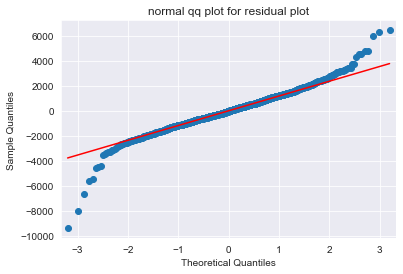

In [34]:
qqplot=sm.qqplot(toyota_df.resid,line='q')
plt.title('normal qq plot for residual plot')
plt.show()

In [35]:
list(np.where(toyota_df.resid>2100))

[array([  14,   16,   19,   49,   52,   53,   62,   63,   64,   66,   68,
          72,   74,   76,   77,   80,   89,   91,  109,  110,  111,  115,
         119,  125,  139,  141,  146,  147,  149,  151,  154,  161,  167,
         171,  174,  178,  179,  223,  468,  523,  557,  656,  693,  696,
         796,  840,  913, 1054, 1058, 1059, 1062, 1079, 1081, 1090, 1131,
        1133, 1142, 1175, 1196, 1211, 1214, 1240, 1250, 1280, 1327, 1378,
        1383, 1402, 1432], dtype=int64)]

In [36]:
toyota_df_influence=toyota_df.get_influence()
(c,_)=toyota_df_influence.cooks_distance

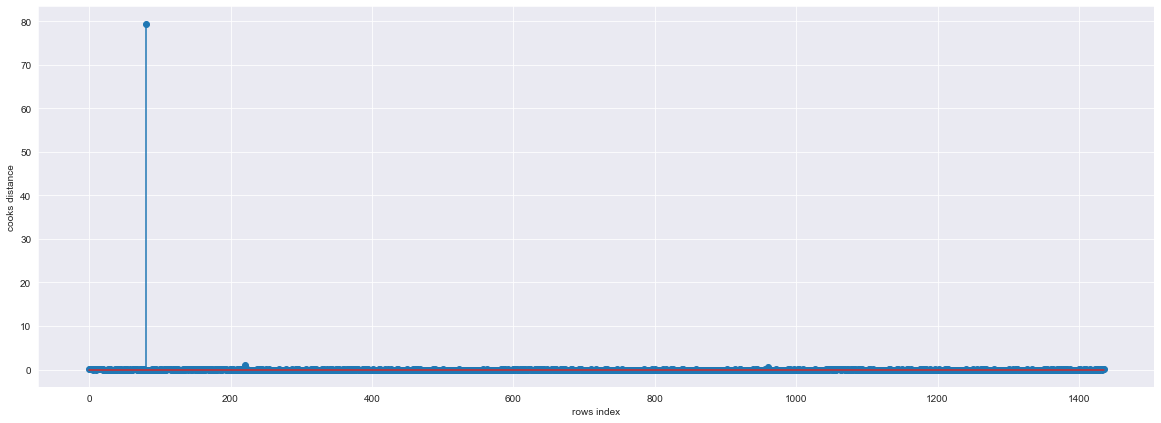

In [39]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota)),np.round(c,3))
plt.xlabel("rows index")
plt.ylabel("cooks distance")
plt.show()

In [41]:
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

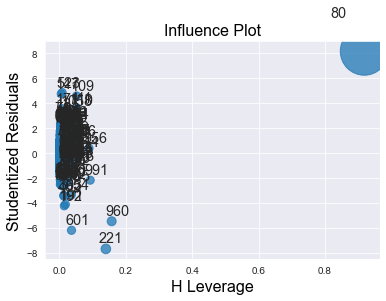

In [42]:
influence_plot(toyota_df)
plt.show()

In [43]:
toyota[toyota.index.isin([80,221,960])]

,price,age,km,hp,cc,doors,gears,quaterlytax,weight
80,18950,25,20019,110,16000,5,5,100,1180
221,12450,44,74172,110,1600,5,5,163,1615
960,9390,66,50806,86,1300,3,5,19,1480


In [46]:
k=toyota.shape[1]
n=toyota.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.020891364902506964

In [47]:
toyota.head()

,price,age,km,hp,cc,doors,gears,quaterlytax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [49]:
toyota_new=toyota
toyota_new.shape

(1436, 9)

In [50]:
toyota_1=toyota_new.drop(toyota_new.index[[80,221,960]],axis=0).reset_index()
toyota_1.shape

(1433, 10)

In [51]:
toyota_1.columns

Index(['index', 'price', 'age', 'km', 'hp', 'cc', 'doors', 'gears',
       'quaterlytax', 'weight'],
      dtype='object')

In [52]:
toyota2=toyota_1.drop(['index'],axis=1)
toyota2.columns

Index(['price', 'age', 'km', 'hp', 'cc', 'doors', 'gears', 'quaterlytax',
       'weight'],
      dtype='object')

In [55]:
final_toyota=smf.ols('price~age+hp+km+cc+doors+gears+quaterlytax',data=toyota2).fit()
final_toyota.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1066.
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:59:03   Log-Likelihood:                -12465.
No. Observations:                1433   AIC:                         2.495e+04
Df Residuals:                    1425   BIC:                         2.499e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.047e+04   1136.891      9.206      0.000    8235.576    1.27e+04
age          -136.7500      2.657    -51.464      0.000    -141.962    -131.538
hp             46.0963      3.208     14.368      0.000      39.803      52.389
km             -0.0193      0.001    -13.694      0.000      -0.022      -0.017
cc             -0.4381      0.315     -1.389      0.165      -1.057       0.181
doors         160.6830     41.968      3.829      0.000      78.357     243.009
gears         602.5777    213.647      2.820      0.005     183.481    1021.674
quaterlytax    18.0266      1.489     12.106      0.000      15.106      20.948
==============================================================================
Omnibus:                      213.039   Durbin-Watson:                   1.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              763.411
Skew:                           0.700   Prob(JB):                    1.69e-166
Kurtosis:                       6.290   Cond. No.                     2.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
final_toyota_influence=final_toyota.get_influence()
(c_f,_)=final_toyota_influence.cooks_distance

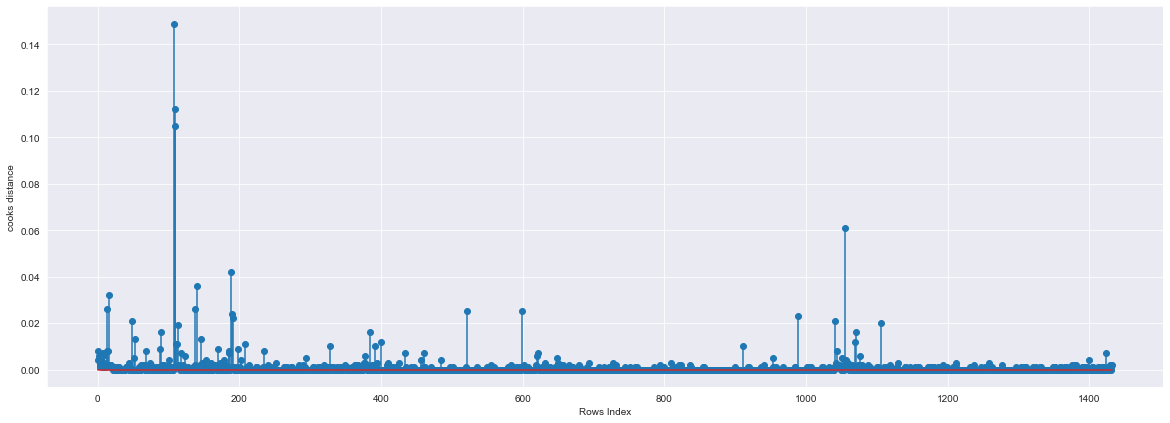

In [59]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota2)),np.round(c_f,3))
plt.xlabel('Rows Index')
plt.ylabel('cooks distance')
plt.show()

In [60]:
(np.argmax(c_f),np.max(c_f))

(108, 0.14891192372085105)

In [62]:
(final_toyota.rsquared,final_toyota.aic,final_toyota.rsquared_adj)

(0.8397124658726294, 24945.82646421677, 0.8389250885120036)

In [63]:
toyota2.head()

,price,age,km,hp,cc,doors,gears,quaterlytax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [65]:
toyota_new_data=pd.DataFrame({'age':40,'km':500,'hp':100,'cc':3000,'doors':4,'gears':6,'quaterlytax':220,'weight':1170},index=[1])


In [66]:
final_toyota.predict(toyota_new_data)

1    16505.449728
dtype: float64